# Linear and Logistic Regression

In [1]:
# Contexte
# X, Y = 2 colonnes numériques
# Il existe une relation linéaire entre les 2 ?
# càd qu'il existe une relation de type Y = A * X + B
# Y = A * X + B + epsilon, avec epsilon un bruit aléatoire de moyenne zéro, et d'écart type << 1

# Géométriquement, une relation linéaire se représente par une droite
# A = pente de la droite
# B = point d'intersection entre la droite et l'axe des Y (ordonnées)

# Pour déterminer le "niveau" de linéarité de la relation X-Y via le coefficient de corrélation de Pearson
# R ~ 1 => relation linéaire, croissante
# R ~ -1 => relation linéaire, décroissante

# Problématiques :
# 1) Il est difficile d'interpréter le coefficient R
# 2) A, B ?
# 3) R est une valeur comprise entre -1 et 1. Comment peut-on calculer une mesure de la pertinence de l'hypothèse
# de linéarité entre X et Y, en terme de valeurs absolues
# 4) Quid de la relation entre X1, ..., XP et Y ?
# 5) Quid si Y n'est pas une colonne numérique mais une colonne binaire (0 ou 1) ?

In [2]:
import statsmodels.api as sm

In [3]:
import numpy as np

In [20]:
X = np.linspace(-1, 1, 100)
Y = X ** 3 + 0.1 * np.random.randn(100)

In [21]:
Y

array([-1.0344199 , -1.00631321, -0.72764714, -0.78767257, -0.62148273,
       -0.67851973, -0.86682353, -0.63491458, -0.74438151, -0.58273854,
       -0.60215749, -0.50774607, -0.45705667, -0.58528409, -0.38490705,
       -0.32357884, -0.19403991, -0.34657937, -0.33433731, -0.11875269,
       -0.24395383, -0.14896523, -0.17919184, -0.36026743, -0.16640486,
       -0.09670982, -0.10157877, -0.09836038,  0.07453883, -0.23157968,
       -0.1967311 , -0.01791965,  0.07553283, -0.00989649, -0.07425034,
        0.05802123, -0.06880267, -0.04495747, -0.06509919, -0.19193562,
        0.14901287,  0.09708274,  0.03552834,  0.07629689,  0.05093999,
        0.08971522,  0.17804072, -0.02302336,  0.0196071 , -0.06565519,
        0.1000602 ,  0.12580873,  0.07911614,  0.04531608,  0.07156811,
       -0.01743637,  0.06235712,  0.04837394, -0.02685064, -0.06428316,
        0.00923839,  0.04013401, -0.09234978,  0.03242487, -0.01492464,
        0.14292264,  0.04968533, -0.03085114,  0.14297214,  0.05

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame({'X': X, 'Y': Y})

In [24]:
df

,X,Y
0,-1.000000,-1.034420
1,-0.979798,-1.006313
2,-0.959596,-0.727647
3,-0.939394,-0.787673
4,-0.919192,-0.621483
...,...,...
95,0.919192,0.624792
96,0.939394,0.930306
97,0.959596,1.042197
98,0.979798,0.880954


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='X', ylabel='Y'>

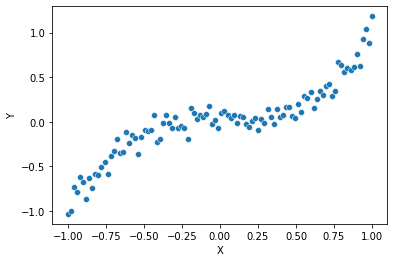

In [25]:
sns.scatterplot(x='X', y='Y', data=df)

<AxesSubplot:xlabel='X', ylabel='Y'>

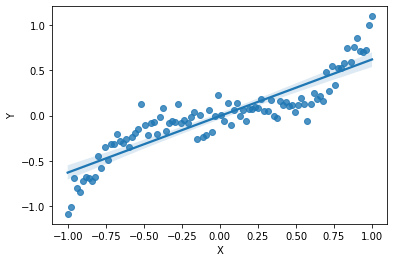

In [11]:
sns.regplot(x='X', y='Y', data=df)

In [12]:
df['X2'] = np.random.randn(100)

In [27]:
X = sm.add_constant(df[['X']])
lr = sm.OLS(df['Y'], X) # Ordinary Least Squares

In [28]:
res = lr.fit()

In [29]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     428.7
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.45e-37
Time:                        20:27:55   Log-Likelihood:                 30.624
No. Observations:                 100   AIC:                            -57.25
Df Residuals:                      98   BIC:                            -52.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.018      0.592      0.555      -0.025       0.046
X              0.6389      0.031     20.706      0.000       0.578       0.700
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.984
Skew:                           0.231   Prob(JB):                        0.611
Kurtosis:                       2.848   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
df['Z'] = 0.638 * df['X']

In [31]:
df

,X,Y,Z
0,-1.000000,-1.034420,-0.638000
1,-0.979798,-1.006313,-0.625111
2,-0.959596,-0.727647,-0.612222
3,-0.939394,-0.787673,-0.599333
4,-0.919192,-0.621483,-0.586444
...,...,...,...
95,0.919192,0.624792,0.586444
96,0.939394,0.930306,0.599333
97,0.959596,1.042197,0.612222
98,0.979798,0.880954,0.625111


<AxesSubplot:xlabel='X', ylabel='Y'>

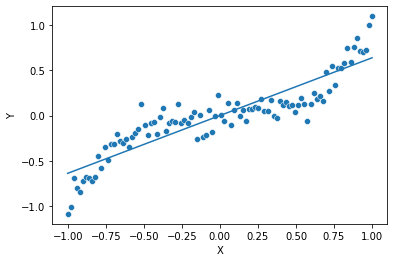

In [18]:
sns.scatterplot(x='X', y='Y', data=df)
sns.lineplot(x='X', y='Z', data=df)

In [ ]:
df

In [32]:
df['squared-dev'] = (df['Y'] - df['Z'])**2

In [33]:
df

,X,Y,Z,squared-dev
0,-1.000000,-1.034420,-0.638000,0.157149
1,-0.979798,-1.006313,-0.625111,0.145315
2,-0.959596,-0.727647,-0.612222,0.013323
3,-0.939394,-0.787673,-0.599333,0.035472
4,-0.919192,-0.621483,-0.586444,0.001228
...,...,...,...,...
95,0.919192,0.624792,0.586444,0.001471
96,0.939394,0.930306,0.599333,0.109543
97,0.959596,1.042197,0.612222,0.184878
98,0.979798,0.880954,0.625111,0.065456


In [34]:
df['squared-dev'].mean()

0.031848150801969476

In [35]:
np.sqrt(df['squared-dev'].mean())

0.17846050207810543

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df['cat'] = df['X'] > 0# .apply(lambda x: x > 0 if np.random.randn() > 0.25 else x < 0)

In [ ]:
df['cat']

In [ ]:
sns.scatterplot(x='X', y='Y', data=df, hue='cat')

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(df['X'].values.reshape(-1, 1), df['cat'])

In [ ]:
logreg.predict(df['X'].values.reshape(-1, 1))